/home/takeshi/.pyenv/versions/3.8.2/envs/probability_robotics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


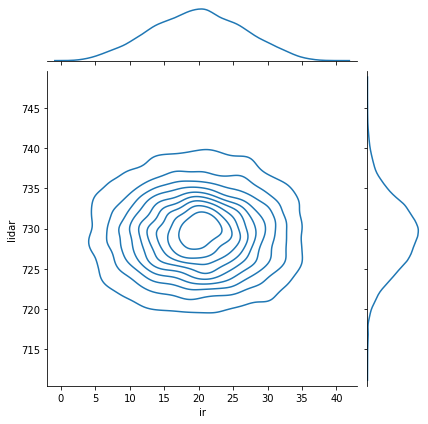

In [3]:
import pandas as pd    ###2dgauss###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_700.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data[ (data["time"] < 160000) & (data["time"] >= 120000) ] #12時から16時までのデータだけ抽出
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [4]:
print("光センサの計測値の分散", d.ir.var())
print("LiDARの計測値の分散", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散", sum(a)/(len(d) - 1))

d.mean()

光センサの計測値の分散 42.117126367701594
LiDARの計測値の分散 17.702026469211457
共分散 -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [5]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [6]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

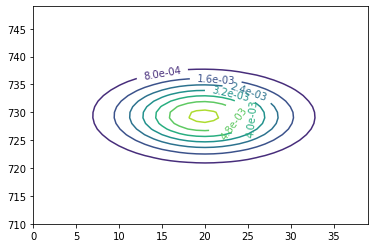

In [7]:
import numpy as np

x, y = np.mgrid[0:40, 710: 750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')
plt.show()

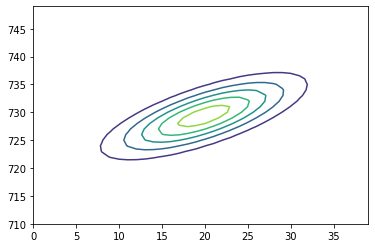

In [9]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))
plt.show()

In [10]:
data = pd.read_csv("sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))

d = data.loc[:, ["ir", "lidar"]]

/home/takeshi/.pyenv/versions/3.8.2/envs/probability_robotics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


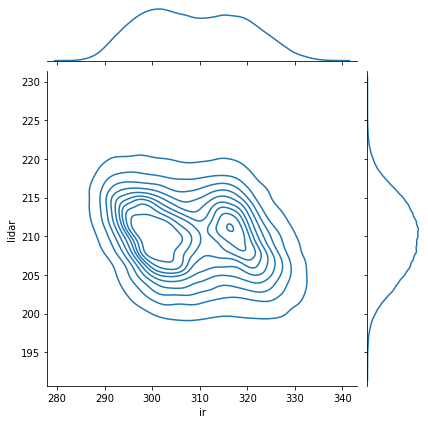

In [11]:
sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
d.cov()

<a list of 5 text.Text objects>

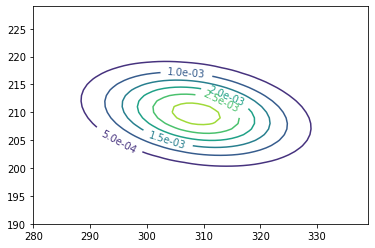

In [12]:
x, y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape+(2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

Text(0, 0.5, 'y')

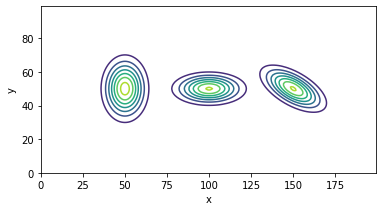

In [13]:
import math
x, y = np.mgrid[0:200, 0:100]
pos = np.empty(x.shape+(2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

a = multivariate_normal(mean=[50, 50], cov=[[50,0], [0, 100]])
b = multivariate_normal(mean=[100, 50], cov=[[125,0], [0, 25]])
c = multivariate_normal(mean=[150, 50], cov=[[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]])

for e in [a, b, c]:
    plt.contour(x, y, e.pdf(pos))
    
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [15]:
eig_vals, eig_vec = np.linalg.eig(c.cov)

print("eig_vals", eig_vals)
print("eig_vec", eig_vec)
print("固有ベクトル1: ", eig_vec[:, 0])
print("固有ベクトル2: ", eig_vec[:, 1])

eig_vals [125.  25.]
eig_vec [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有ベクトル1:  [ 0.8660254 -0.5      ]
固有ベクトル2:  [0.5       0.8660254]


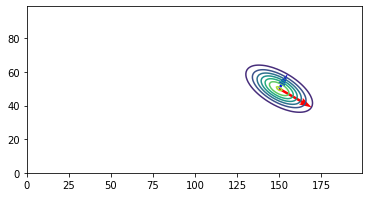

In [17]:
plt.contour(x, y, c.pdf(pos))

v = 2 * math.sqrt(eig_vals[0]) * eig_vec[:, 0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="red", angles='xy', scale_units='xy', scale=1)

v = 2 * math.sqrt(eig_vals[1]) * eig_vec[:, 1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="blue", angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')
plt.show()